In [1]:
import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets\label klasifikasi kecurangan voice.txt
datasets\test\audio\1 0010.wav
datasets\test\audio\1 0021.wav
datasets\test\audio\1 0023.wav
datasets\test\audio\1 0030.wav
datasets\test\audio\1 0035.wav
datasets\test\audio\1 0039.wav
datasets\test\audio\1 0045.wav
datasets\test\audio\1 0050.wav
datasets\test\audio\1 0054.wav
datasets\test\audio\1 0058.wav
datasets\test\audio\1 0059.wav
datasets\test\audio\1 0065.wav
datasets\test\audio\1 0068.wav
datasets\test\audio\1 0072.wav
datasets\test\audio\1 0078.wav
datasets\test\audio\1 0085.wav
datasets\test\audio\1 0087.wav
datasets\test\audio\1 0093.wav
datasets\test\audio\1 0096.wav
datasets\test\audio\1 0098.wav
datasets\test\audio\2 0019.wav
datasets\test\audio\2 0023.wav
datasets\test\audio\2 0026.wav
datasets\test\audio\2 0032.wav
datasets\test\audio\2 0037.wav
datasets\test\audio\2 0041.wav
datasets\test\audio\2 0049.wav
datasets\test\audio\2 0056.wav
datasets\test\audio\2 0060.wav
datasets\test\audio\2 0061.wav
datasets\test\audio\2 

In [2]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_audio_path = 'C:/Users/ASUS/Untitled Folder/Sample-TA/datasets/train/audio/'

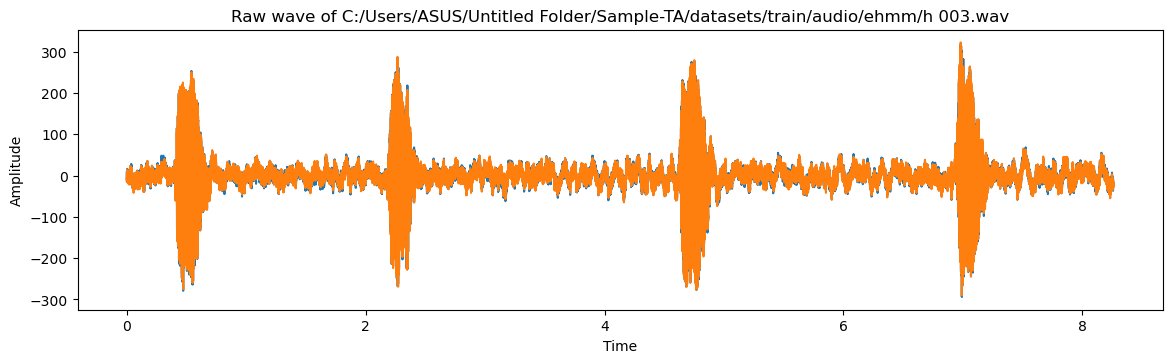

Sample Rate: 44100
Number of Samples: 364187


In [5]:
filename = 'ehmm/h 003.wav'
sample_rate, samples = wavfile.read(train_audio_path + filename)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path + 'ehmm/h 003.wav')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples) / sample_rate, len(samples)), samples)
plt.show()
print('Sample Rate:', sample_rate)
print('Number of Samples:', len(samples))

In [6]:
import soundfile as sf

samples_int16 = samples.astype(np.int16)
sf.write('audio.wav', samples_int16, sample_rate)
ipd.Audio('audio.wav')


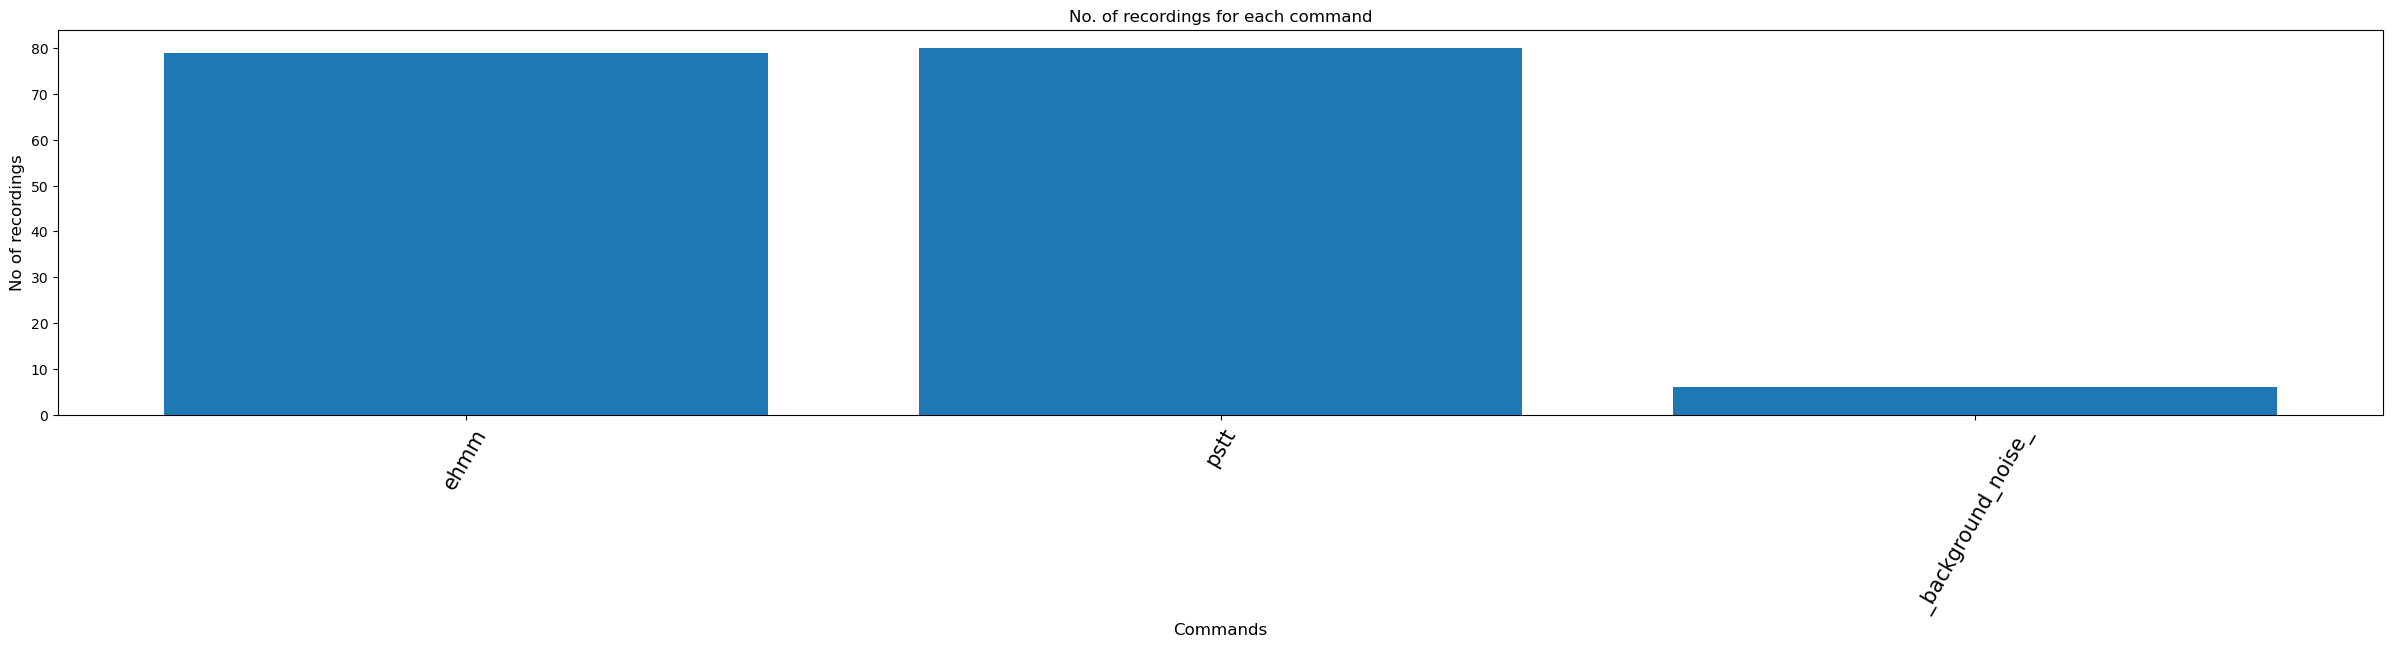

In [7]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["pstt", "ehmm", "_background_noise_"]

(array([159.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   1.]),
 array([ 6.40061224, 15.27886352, 24.1571148 , 33.03536607, 41.91361735,
        50.79186862, 59.6701199 , 68.54837117, 77.42662245, 86.30487372,
        95.183125  ]),
 <BarContainer object of 10 artists>)

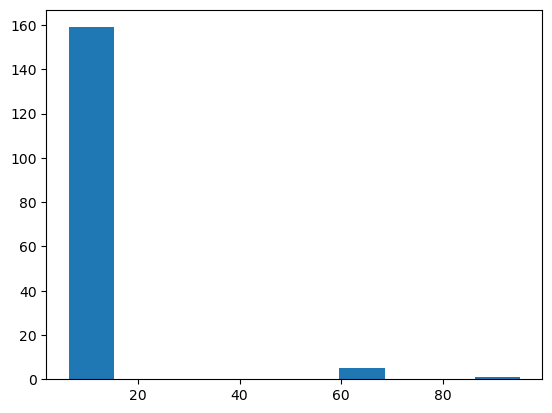

In [8]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + "/" +label +"/") if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [9]:
import os
import librosa
import numpy as np

train_audio_path = 'C:/Users/ASUS/Untitled Folder/Sample-TA/datasets/train/audio'

all_wave = []
all_label = []
desired_length = 8000

for label in os.listdir(train_audio_path):
    print(label)
    waves = [f for f in os.listdir(os.path.join(train_audio_path, label)) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(os.path.join(train_audio_path, label, wav), sr=16000)
        if len(samples) < desired_length:
            samples = np.pad(samples, (0, desired_length - len(samples)))
        elif len(samples) > desired_length:
            samples = samples[:desired_length]
        all_wave.append(samples)
        all_label.append(label)

ehmm
pstt
_background_noise_


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
print(classes)

['_background_noise_', 'ehmm', 'pstt']


In [11]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

In [12]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
print(all_wave)


[[[-7.6243386e-04]
  [-1.2831766e-03]
  [-1.1207937e-03]
  ...
  [-6.9462968e-04]
  [-6.3518615e-04]
  [-6.4464263e-04]]

 [[ 2.1887326e-04]
  [ 3.0673505e-04]
  [ 2.9720381e-04]
  ...
  [-4.5246659e-03]
  [-4.4145151e-03]
  [-4.3734196e-03]]

 [[ 3.1122571e-04]
  [ 6.0418941e-04]
  [ 4.5506033e-04]
  ...
  [ 5.3564797e-04]
  [ 5.4264558e-04]
  [ 5.2827934e-04]]

 ...

 [[ 6.6107178e-01]
  [ 3.1683350e-01]
  [ 4.2083740e-01]
  ...
  [ 1.0031128e-01]
  [ 1.9882202e-01]
  [-4.3670654e-02]]

 [[ 0.0000000e+00]
  [ 0.0000000e+00]
  [ 0.0000000e+00]
  ...
  [-6.1645508e-03]
  [-3.6621094e-02]
  [-4.3273926e-02]]

 [[-5.3894043e-02]
  [-4.9334717e-01]
  [-5.3335571e-01]
  ...
  [-7.0693970e-01]
  [ 5.6845093e-01]
  [-2.2463989e-01]]]


In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [14]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

conv = Conv1D(16, 13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.01)(conv)

conv = Conv1D(32, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.01)(conv)

conv = Conv1D(64, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.01)(conv)

conv = Conv1D(128, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.01)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
#conv = Dense(256, activation='relu')(conv)
#conv = Dense(512, activation='relu')(conv)
conv = Dense(1024, activation='relu')(conv)

conv = Dropout(0.01)(conv)

conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.01)(conv)

conv = Dense(64, activation='relu')(conv)
conv = Dropout(0.01)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 16)          224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 16)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 16)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 32)          5664      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 32)          0         
 1D)                                                         

In [15]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', save_weights_only=True, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [17]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=128, validation_data=(x_val,y_val))

Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 1.1675 - accuracy: 0.3712
Epoch 1: val_accuracy improved from -inf to 0.48485, saving model to best_model.hdf5
2/2 [==============================] - 8s 1s/step - loss: 1.1675 - accuracy: 0.3712 - val_loss: 2.0525 - val_accuracy: 0.4848
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 1.4172 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.48485
2/2 [==============================] - 2s 463ms/step - loss: 1.4172 - accuracy: 0.5000 - val_loss: 2.3159 - val_accuracy: 0.4848
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 2.2699 - accuracy: 0.4697
Epoch 3: val_accuracy did not improve from 0.48485
2/2 [==============================] - 2s 485ms/step - loss: 2.2699 - accuracy: 0.4697 - val_loss: 0.8229 - val_accuracy: 0.4848
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.4924
Epoch 4: val_accuracy did not improve from 0.48485
2/2 [=====

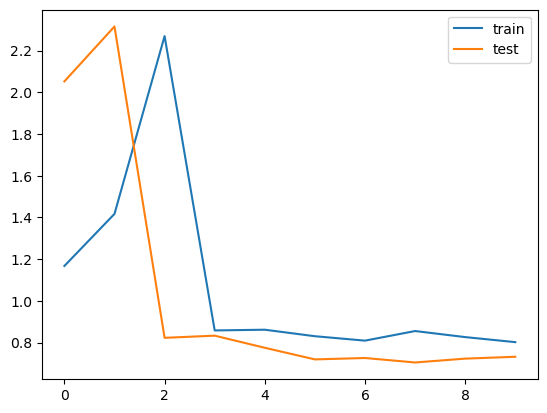

In [18]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

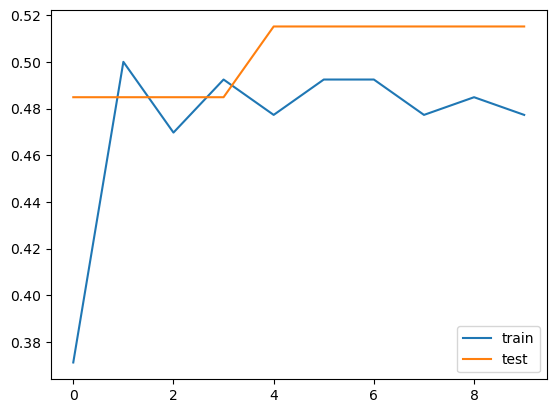

In [19]:
from matplotlib import pyplot 
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend()
pyplot.show()

In [20]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [21]:
import random
import numpy as np
import IPython.display as ipd

index = random.randint(0, len(x_val) - 1)
samples = x_val[index].ravel()
print("Audio:", classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)


Audio: pstt


In [22]:
print("Text:",predict(samples))

1/1 [==============================] - 0s 438ms/step
Text: pstt


In [23]:
from keras.applications.vgg16 import VGG16

In [24]:
model = VGG16(weights = 'imagenet',
              include_top = 'False',
              input_shape = (224, 224, 3))

In [25]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa as lib
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [28]:
y, sr = librosa.load(os.path.join(train_audio_path, label, wav))
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-0.00190086 -0.36103535 -0.703243   -0.3286029   0.2205642   0.35302478
  0.06491715 -0.40496743 -0.47083956 -0.35084343]
shape y: (1323000,)
sr: 22050


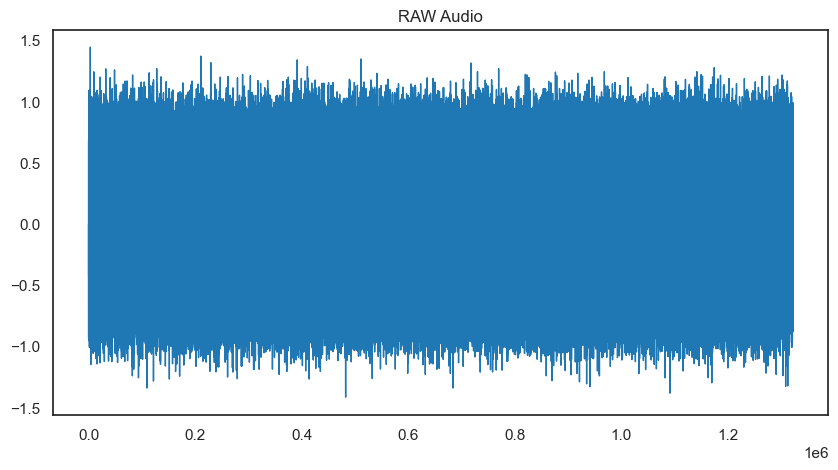

In [29]:
pd.Series(y).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio',
                 color=color_pal[0])
plt.show()

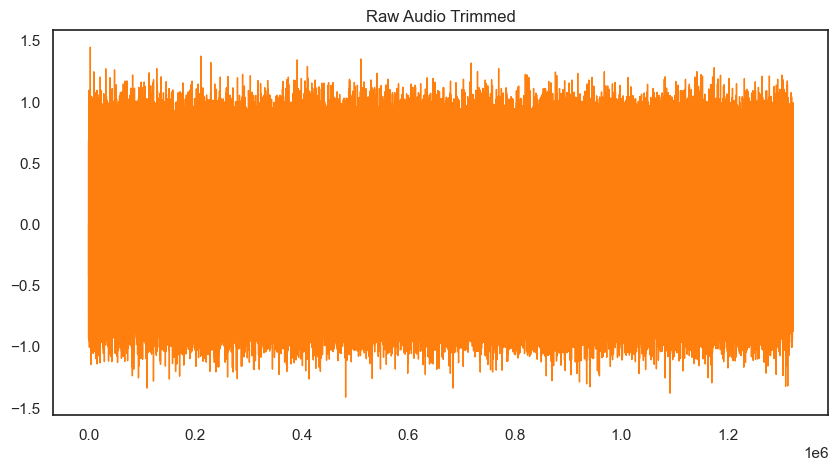

In [30]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                         lw=1,
                         title='Raw Audio Trimmed',
                        color=color_pal[1])
plt.show()

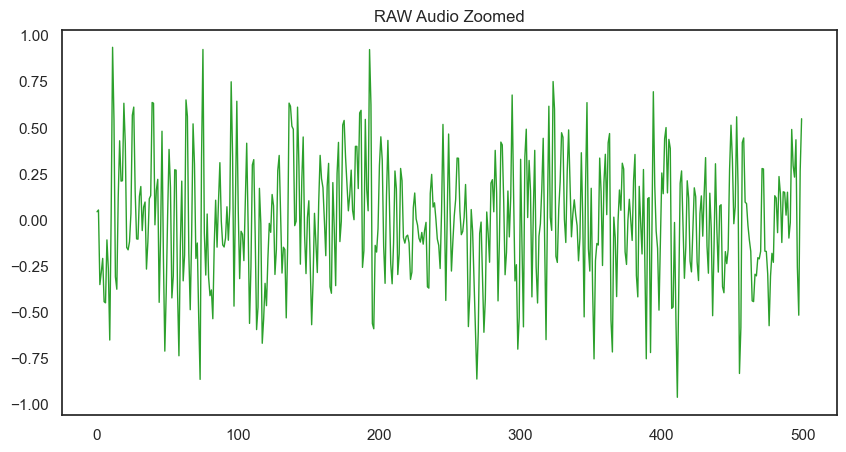

In [31]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio Zoomed',
                 color=color_pal[2])
plt.show()

In [32]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 2584)

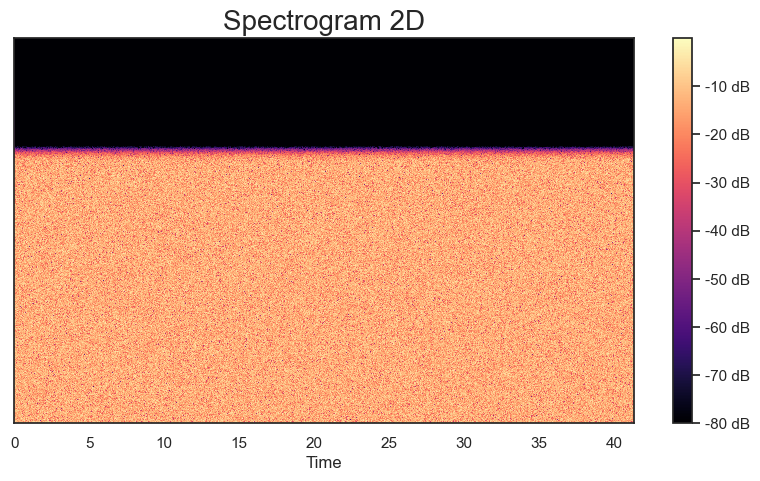

In [33]:
import librosa

D = librosa.stft(y)
S_db = np.squeeze(S_db)
sample_rate = librosa.get_samplerate(os.path.join(train_audio_path, label, wav))

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              sr=sample_rate,
                              hop_length=256,
                              ax=ax)
ax.set_title('Spectrogram 2D', fontsize=20)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()


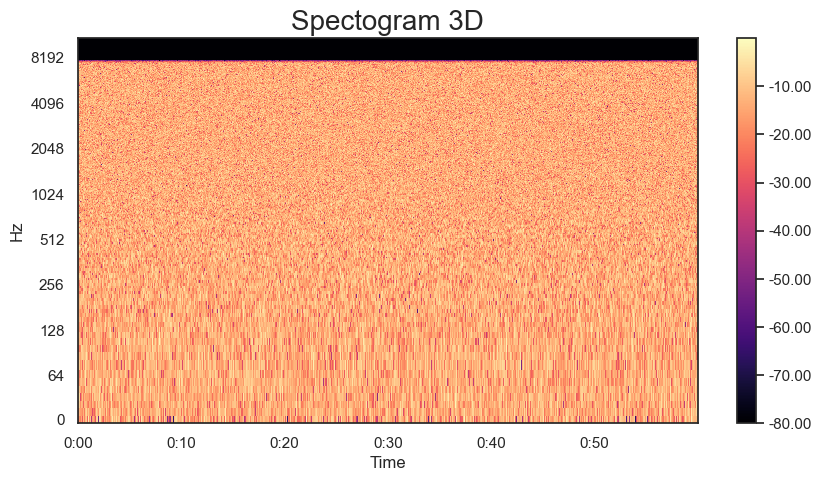

In [34]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram 3D', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [35]:
S = librosa.feature.melspectrogram(y=y,
                                 sr=sr,
                                 n_mels=128, )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

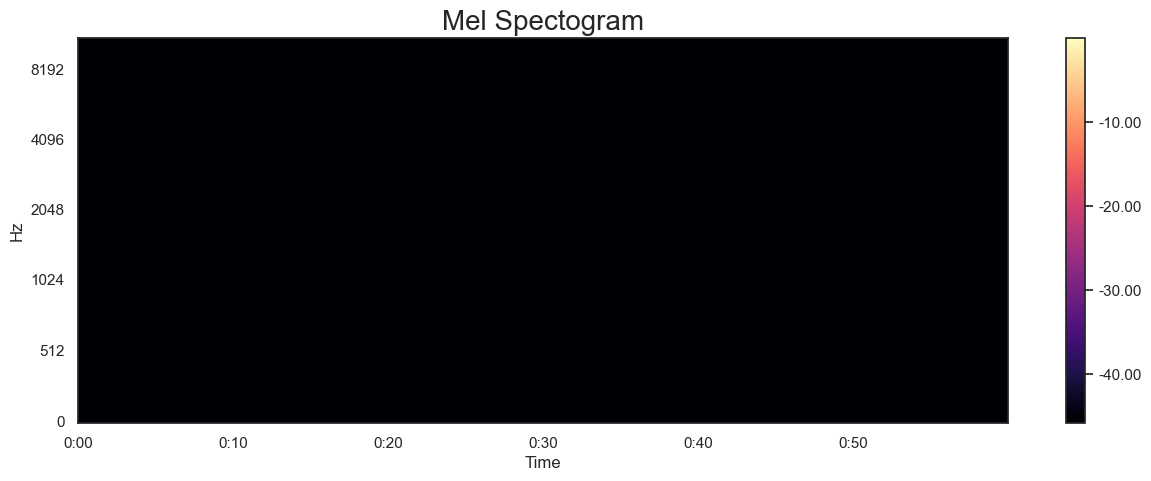

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the mel spectogram
img = librosa.display.specshow(librosa.power_to_db(S_db_mel, ref=np.max),
                              x_axis='time',
                              y_axis='mel',
                              ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [37]:
S_db_mel

array([[-20.470026, -20.645958, -15.918873, ..., -24.062504, -12.180382,
        -13.579285],
       [-16.537855, -13.519613, -17.786026, ..., -19.55405 , -15.070971,
        -12.640429],
       [-23.407885, -20.744549, -26.594429, ..., -21.832571, -18.71243 ,
        -16.456606],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)